In [1]:
pip install pandas sqlalchemy pymysql


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Loading the store data set
stores_df = pd.read_csv(r"D:\PROJECTS\EDA\DATA'S\Stores.csv", encoding='ISO-8859-1')

stores_df.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [4]:
# Fill with the mean value
stores_df['Square Meters'].fillna(stores_df['Square Meters'].mean(), inplace=True)
stores_df.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

In [5]:
stores_df.dtypes

StoreKey           int64
Country           object
State             object
Square Meters    float64
Open Date         object
dtype: object

In [6]:
# Convert 'Open Date' to datetime
stores_df['Open Date'] = pd.to_datetime(stores_df['Open Date'], errors='coerce')

# Verify the conversion
print(stores_df['Open Date'].dtype)


datetime64[ns]


In [7]:
# Check for duplicates
duplicates = stores_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if necessary
if duplicates > 0:
    stores_df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [8]:
# Summary statistics
print(stores_df.describe(include='all'))


         StoreKey        Country                         State  Square Meters  \
count   67.000000             67                            67      67.000000   
unique        NaN              9                            67            NaN   
top           NaN  United States  Australian Capital Territory            NaN   
freq          NaN             24                             1            NaN   
mean    33.000000            NaN                           NaN    1402.196970   
min      0.000000            NaN                           NaN     245.000000   
25%     16.500000            NaN                           NaN    1112.500000   
50%     33.000000            NaN                           NaN    1365.000000   
75%     49.500000            NaN                           NaN    2000.000000   
max     66.000000            NaN                           NaN    2105.000000   
std     19.485037            NaN                           NaN     572.020693   

                           

In [9]:
# Unique entries in 'Country'
print("Unique Countries:")
print(stores_df['Country'].value_counts())

# Unique entries in 'State'
print("\nUnique States:")
print(stores_df['State'].value_counts())


Unique Countries:
Country
United States     24
Germany            9
United Kingdom     7
France             7
Australia          6
Netherlands        5
Canada             5
Italy              3
Online             1
Name: count, dtype: int64

Unique States:
State
Australian Capital Territory    1
Northern Territory              1
South Australia                 1
Tasmania                        1
Victoria                        1
                               ..
Utah                            1
Washington DC                   1
West Virginia                   1
Wyoming                         1
Online                          1
Name: count, Length: 67, dtype: int64


In [10]:
# Load the sales data
sales_df = pd.read_csv(r"D:\PROJECTS\EDA\DATA'S\Sales.csv", encoding='ISO-8859-1')

# Merge stores with sales data
merged_data = pd.merge(stores_df, sales_df, left_on='StoreKey', right_on='StoreKey', how='left')

# Check the merged DataFrame
print(merged_data.info())
print(merged_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62893 entries, 0 to 62892
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StoreKey       62893 non-null  int64         
 1   Country        62893 non-null  object        
 2   State          62893 non-null  object        
 3   Square Meters  62893 non-null  float64       
 4   Open Date      62893 non-null  datetime64[ns]
 5   Order Number   62884 non-null  float64       
 6   Line Item      62884 non-null  float64       
 7   Order Date     62884 non-null  object        
 8   Delivery Date  13165 non-null  object        
 9   CustomerKey    62884 non-null  float64       
 10  ProductKey     62884 non-null  float64       
 11  Quantity       62884 non-null  float64       
 12  Currency Code  62884 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 6.2+ MB
None
StoreKey             0
Country          

In [11]:
# Handle missing values in the merged dataset

# Option 1: Fill missing values with placeholders
merged_data['Order Number'].fillna('Unknown', inplace=True)
merged_data['Line Item'].fillna(0, inplace=True)
merged_data['Order Date'].fillna(pd.to_datetime('1970-01-01'), inplace=True)
merged_data['CustomerKey'].fillna('Unknown', inplace=True)
merged_data['ProductKey'].fillna('Unknown', inplace=True)
merged_data['Quantity'].fillna(0, inplace=True)
merged_data['Currency Code'].fillna('USD', inplace=True)

# Option 2: Handle Delivery Date
# Given the significant number of missing values, you can drop this column or fill it
# Option to drop
merged_data.drop(columns=['Delivery Date'], inplace=True)

# Option to fill with NaT if you want to keep it
# merged_data['Delivery Date'].fillna(pd.NaT, inplace=True)

# Verify missing values again
print(merged_data.isnull().sum())

# Summary statistics after handling missing values
print(merged_data.describe(include='all'))


StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
Order Number     0
Line Item        0
Order Date       0
CustomerKey      0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64
            StoreKey        Country   State  Square Meters  \
count   62893.000000          62893   62893   62893.000000   
unique           NaN              9      67            NaN   
top              NaN  United States  Online            NaN   
freq             NaN          26559   13165            NaN   
mean       31.802315            NaN     NaN    1554.175872   
min         0.000000            NaN     NaN     245.000000   
25%         8.000000            NaN     NaN    1300.000000   
50%        37.000000            NaN     NaN    1402.196970   
75%        53.000000            NaN     NaN    2000.000000   
max        66.000000            NaN     NaN    2105.000000   
std        22.977937            NaN     NaN     418.001069   

              

In [12]:
# Assuming 'Sales Amount' is a column in merged_data
store_sales_performance = merged_data.groupby('StoreKey')['Quantity'].sum().reset_index()

# Sort by sales quantity
store_sales_performance = store_sales_performance.sort_values(by='Quantity', ascending=False)

print("Sales Performance by Store:")
print(store_sales_performance)


Sales Performance by Store:
    StoreKey  Quantity
0          0   41311.0
9          9    4894.0
55        55    4826.0
50        50    4773.0
61        61    4771.0
..       ...       ...
35        35       0.0
46        46       0.0
52        52       0.0
58        58       0.0
60        60       0.0

[67 rows x 2 columns]


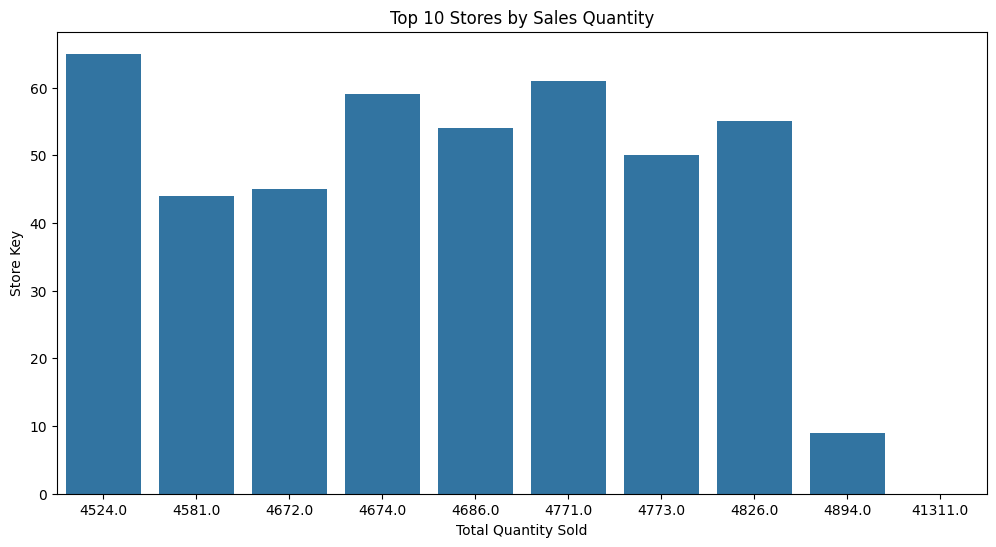

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing sales performance by store
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='StoreKey', data=store_sales_performance.head(10))
plt.title('Top 10 Stores by Sales Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Store Key')
plt.show()


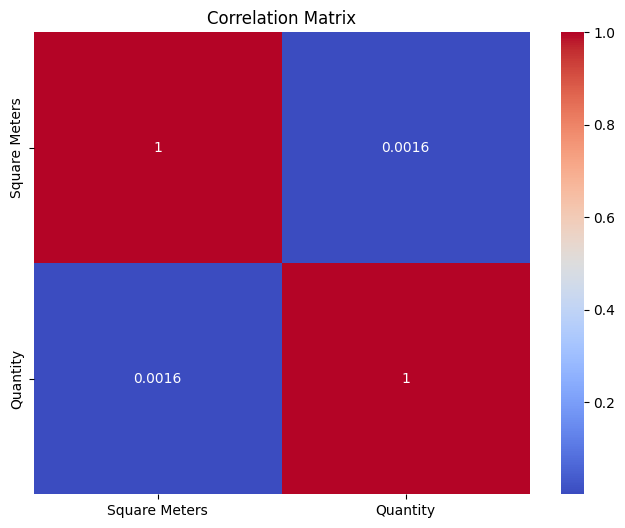

In [14]:
# Correlation matrix
correlation_matrix = merged_data[['Square Meters', 'Quantity']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [15]:
# 1. Store Performance

# Calculate operational years
merged_data['Open Date'] = pd.to_datetime(merged_data['Open Date'])  # Ensure Open Date is in datetime format
merged_data['Operational Years'] = (pd.to_datetime('today') - merged_data['Open Date']).dt.days / 365

# Aggregate store performance metrics
store_performance = merged_data.groupby('StoreKey').agg({
    'Quantity': 'sum',
    'Square Meters': 'mean',
    'Operational Years': 'mean'
}).reset_index()

store_performance.columns = ['StoreKey', 'Total Sales Quantity', 'Average Size (m²)', 'Operational Years']
print("Store Performance Metrics:")
print(store_performance)


Store Performance Metrics:
    StoreKey  Total Sales Quantity  Average Size (m²)  Operational Years
0          0               41311.0         1402.19697          14.783562
1          1                 871.0          595.00000          16.786301
2          2                  61.0          665.00000          16.756164
3          3                   0.0         2000.00000          12.767123
4          4                1286.0         2000.00000          14.783562
..       ...                   ...                ...                ...
62        62                2393.0         1120.00000           6.358904
63        63                2875.0         2000.00000          16.608219
64        64                4289.0         1330.00000          14.783562
65        65                4524.0         1785.00000          12.783562
66        66                3986.0          840.00000          10.780822

[67 rows x 4 columns]


In [16]:
# Calculate total sales quantity by country
geographical_sales = merged_data.groupby('Country')['Quantity'].sum().reset_index()
geographical_sales = geographical_sales.sort_values(by='Quantity', ascending=False)

print("Total Sales by Country:")
print(geographical_sales)

# If you want to analyze by State as well
state_sales = merged_data.groupby('State')['Quantity'].sum().reset_index()
state_sales = state_sales.sort_values(by='Quantity', ascending=False)

print("Total Sales by State:")
print(state_sales)


Total Sales by Country:
          Country  Quantity
8   United States   83638.0
6          Online   41311.0
7  United Kingdom   20625.0
3         Germany   14880.0
1          Canada   12991.0
0       Australia    7085.0
4           Italy    6986.0
5     Netherlands    5909.0
2          France    4332.0
Total Sales by State:
                    State  Quantity
49                 Online   41311.0
47  Northwest Territories    4894.0
39                 Nevada    4826.0
29                 Kansas    4773.0
56         South Carolina    4771.0
..                    ...       ...
40          New Brunswick       0.0
55        South Australia       0.0
52           Rhode Island       0.0
65                  Yukon       0.0
66                Zeeland       0.0

[67 rows x 2 columns]


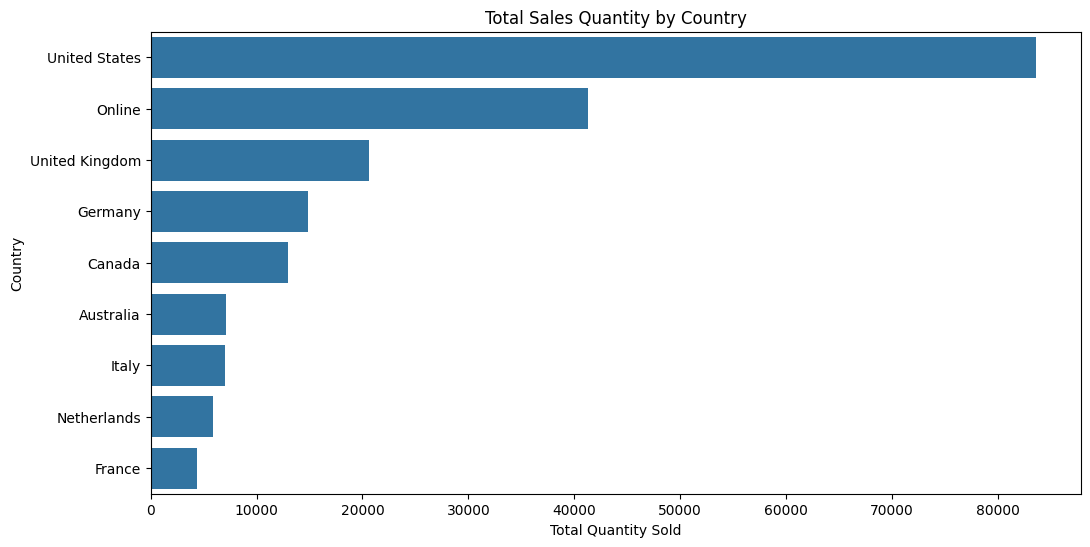

In [17]:
# Visualizing sales by country
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Country', data=geographical_sales)
plt.title('Total Sales Quantity by Country')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')
plt.show()


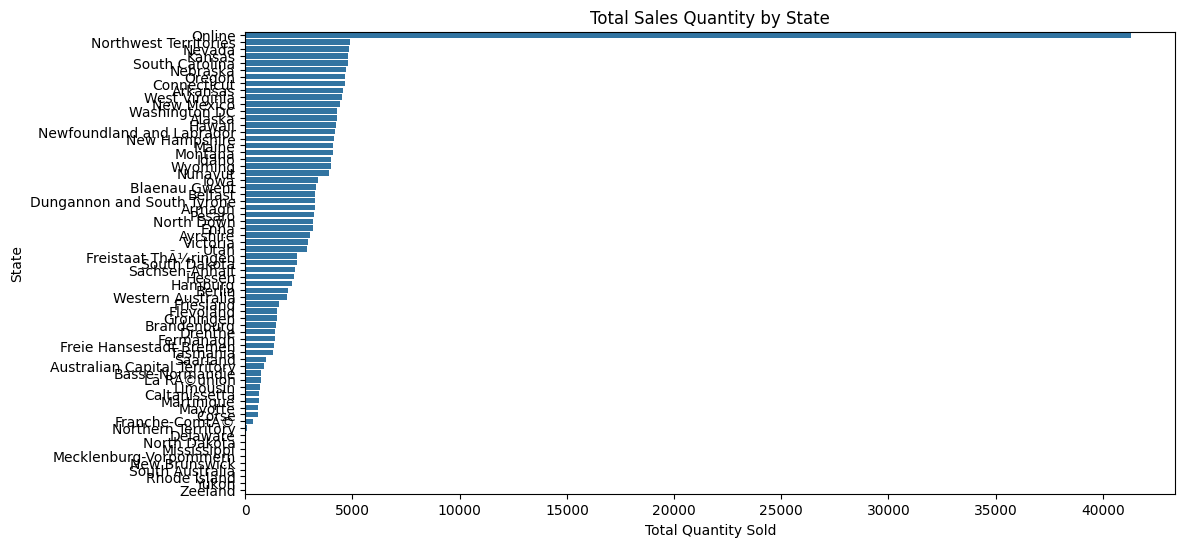

In [18]:
# Visualizing sales by state
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='State', data=state_sales)
plt.title('Total Sales Quantity by State')
plt.xlabel('Total Quantity Sold')
plt.ylabel('State')
plt.show()


In [19]:
import pandas as pd

# Define the path for saving the combined CSV file
output_path = r"D:\PROJECTS\EDA\Cleanned Data\store_analysis.csv"

# Create a dictionary of your DataFrames
dataframes = {
    'Stores Data': stores_df,
    'Store_analysis Data': merged_data,
    'Store Performance': store_performance,
    'Sales by Country': geographical_sales,
    'Sales by State': state_sales
}

# Concatenate all DataFrames into one using a different variable name
all_data = pd.concat(
    [df.assign(Source=sheet_name) for sheet_name, df in dataframes.items()],
    ignore_index=True
)

# Save the combined DataFrame to a single CSV file
all_data.to_csv(output_path, index=False)

print(f"Data successfully saved to {output_path}")


Data successfully saved to D:\PROJECTS\EDA\Cleanned Data\store_analysis.csv


In [20]:
all_data

,StoreKey,Country,State,Square Meters,Open Date,Source,Order Number,Line Item,Order Date,CustomerKey,ProductKey,Quantity,Currency Code,Operational Years,Total Sales Quantity,Average Size (m²)
0,1.0,Australia,Australian Capital Territory,595.0,2008-01-01,Stores Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Australia,Northern Territory,665.0,2008-01-12,Stores Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Australia,South Australia,2000.0,2012-01-07,Stores Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Australia,Tasmania,2000.0,2010-01-01,Stores Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Australia,Victoria,2000.0,2015-12-09,Stores Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63098,NaN,NaN,New Brunswick,NaN,NaT,Sales by State,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
63099,NaN,NaN,South Australia,NaN,NaT,Sales by State,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
63100,NaN,NaN,Rhode Island,NaN,NaT,Sales by State,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
63101,NaN,NaN,Yukon,NaN,NaT,Sales by State,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [21]:
all_data.dtypes

StoreKey                       float64
Country                         object
State                           object
Square Meters                  float64
Open Date               datetime64[ns]
Source                          object
Order Number                    object
Line Item                      float64
Order Date                      object
CustomerKey                     object
ProductKey                      object
Quantity                       float64
Currency Code                   object
Operational Years              float64
Total Sales Quantity           float64
Average Size (m²)              float64
dtype: object

In [23]:
from sqlalchemy import create_engine

# Database connection details
user = 'root'
password = 'Krishna3_6_9'
host = '127.0.0.1'
database = 'Datas'

# Create a database connection
connection_string = f'mysql+pymysql://{user}:{password}@{host}/{database}'
engine = create_engine(connection_string)

# Store the purchase_summary DataFrame to the database
all_data.to_sql('Store_analysis', con=engine, index=False, if_exists='replace')

print("Data successfully stored in the MySQL database.")


Data successfully stored in the MySQL database.


In [24]:
store_performance.dtypes

StoreKey                  int64
Total Sales Quantity    float64
Average Size (m²)       float64
Operational Years       float64
dtype: object

In [25]:
geographical_sales.dtypes

Country      object
Quantity    float64
dtype: object

In [28]:
state_sales.dtypes

State        object
Quantity    float64
dtype: object

In [26]:
state_sales.dtypes

State        object
Quantity    float64
dtype: object